<a href="https://colab.research.google.com/github/UKD1211/100_days_ML_cX_ISI_DS/blob/main/mean_median_imputation_day_36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("/content/titanic_toy.csv")

In [4]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [7]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [8]:

X = df.drop(columns=['Survived'])
y = df['Survived']

In [9]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [10]:
X_train.isnull().mean()

,0
Age,0.207865
Fare,0.050562
Family,0.000000


In [11]:
mean_age = X_train['Age'].mean()
mean_fare = X_train['Fare'].mean()

In [12]:
mean_fare

np.float64(32.61759689349112)

<Axes: xlabel='Age', ylabel='Density'>

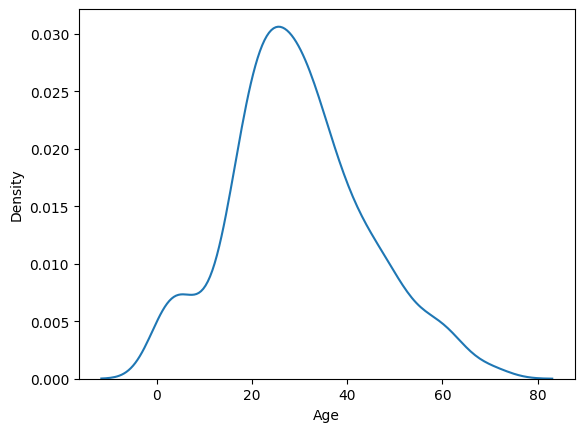

In [13]:
import seaborn as sns
sns.kdeplot(X_train['Age'])

<Axes: xlabel='Age', ylabel='Density'>

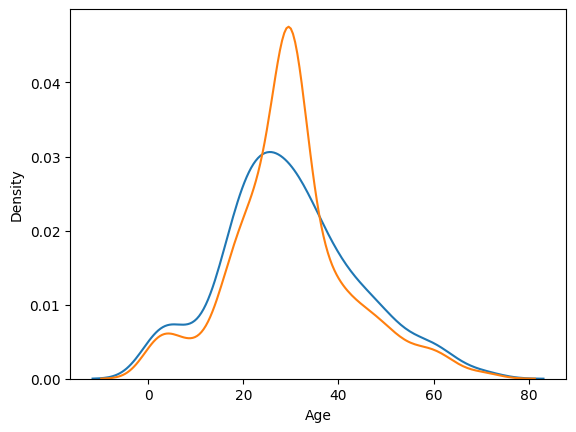

In [14]:
sns.kdeplot(X_train['Age'])
sns.kdeplot(X_train['Age'].fillna(mean_age))

<Axes: xlabel='Fare', ylabel='Density'>

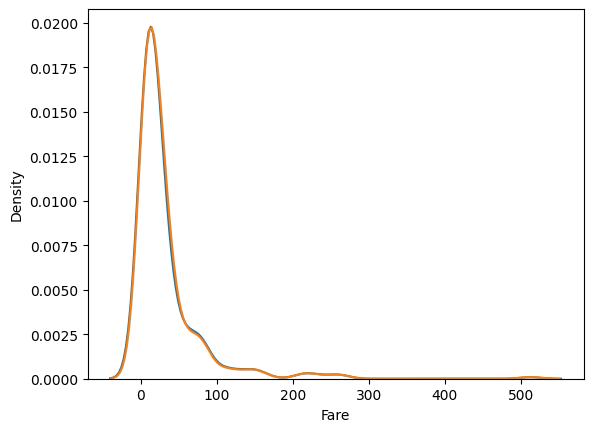

In [15]:
sns.kdeplot(X_train['Fare'])
sns.kdeplot(X_train['Fare'].fillna(mean_fare))

In [16]:
mean_age = X_train['Age'].mean()
mean_fare = X_train['Fare'].mean()

median_age = X_train['Age'].median()
median_fare = X_train['Fare'].median()

<Axes: xlabel='Age', ylabel='Density'>

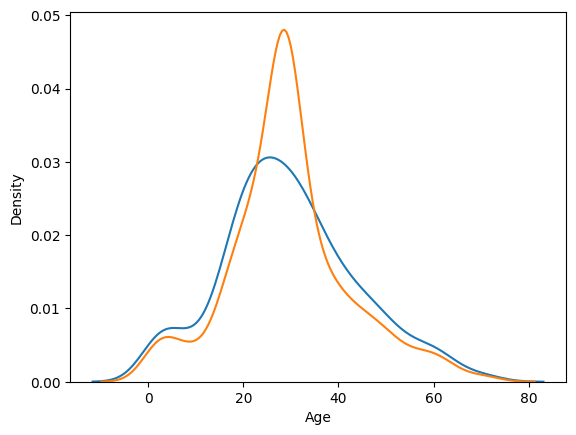

In [17]:
sns.kdeplot(X_train['Age'])
sns.kdeplot(X_train['Age'].fillna(median_age))

<Axes: xlabel='Fare', ylabel='Density'>

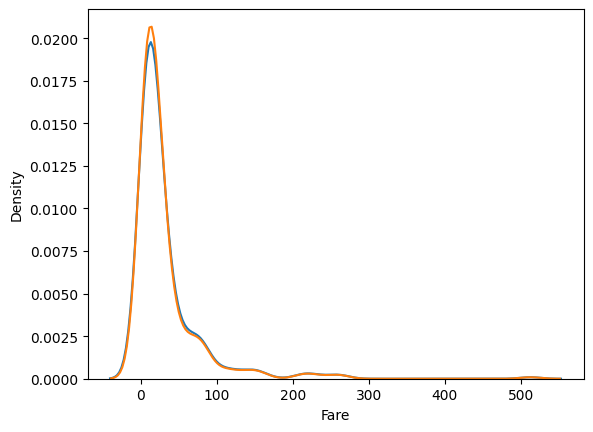

In [18]:
sns.kdeplot(X_train['Fare'])
sns.kdeplot(X_train['Fare'].fillna(median_fare))

In [19]:

mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [20]:

X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [21]:

X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
253,30.0,16.100,1,30.00,30.000000,16.100,16.100
17,NaN,13.000,0,28.75,29.785904,13.000,13.000
537,30.0,106.425,0,30.00,30.000000,106.425,106.425
802,11.0,120.000,3,11.00,11.000000,120.000,120.000
799,30.0,24.150,2,30.00,30.000000,24.150,24.150


In [22]:

print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


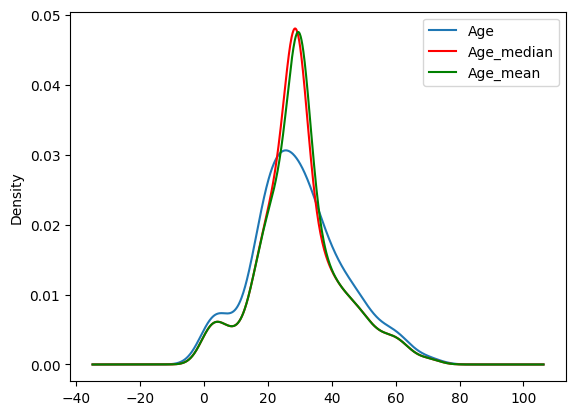

In [23]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

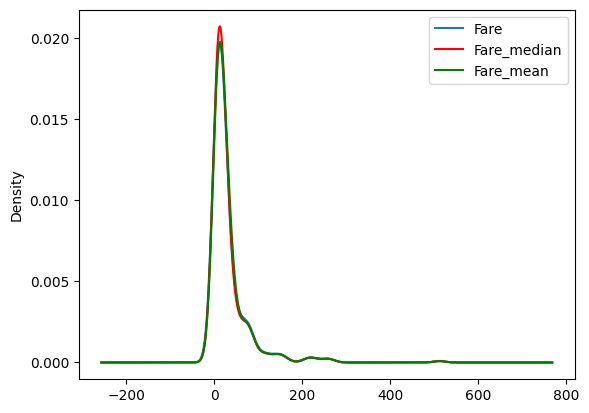

In [24]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [25]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


<Axes: >

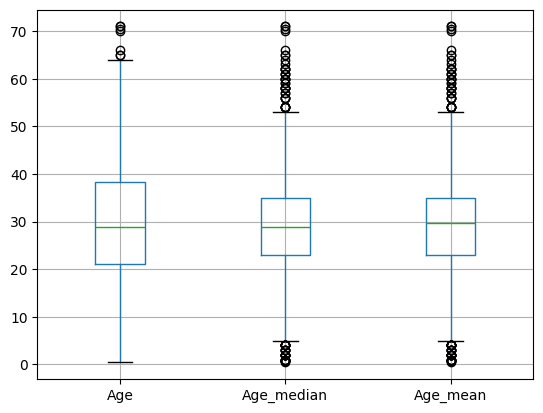

In [26]:

X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

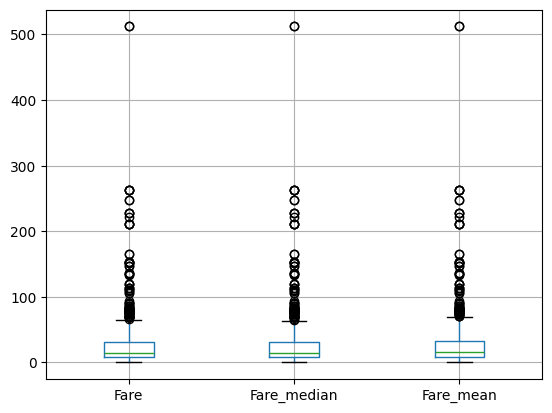

In [27]:

X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# **Using Sklearn**

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [34]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,3,0
889,26.0,NaN,0,1


In [37]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
    ('age_impute',SimpleImputer(strategy="mean"),['Age']),
    ('fare_impute',SimpleImputer(strategy = "median"),['Fare'])
],remainder="passthrough")

In [38]:
trf.fit_transform(X_train)

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])

In [41]:
print(trf.named_transformers_['age_impute'].statistics_)
print(trf.named_transformers_['fare_impute'].statistics_)

[29.78590426]
[14.4583]


In [42]:

X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [43]:
X_train

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   0.        ],
       [ 29.78590426,  25.925     ,   0.        ]])